### Customer dataset
There is a customer dataset, and we need to apply customer segmentation on the historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. 

One group might contain customers who are high-profit and low-risk, that means, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. 

Let's use Kmeans clustering algorithm to complete the task.

In [1]:
# Lets first import the required libraries. 
# Also run %matplotlib inline since we will be plotting in this section
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

### Data loading
We load the data from a csv file  

In [2]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Data cleaning

__Address__ in this dataset is a categorical variable, but since k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature.

In [3]:
df = cust_df.drop('Address', axis=1)
df.tail()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9
849,850,52,1,16,64,1.866,3.638,0.0,8.6


### Normalizing over the standard deviation
Now let's use __StandardScaler()__ to normalize our dataset.

In [4]:
##...Normalizing over the standard deviation....
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

In [5]:
X[0:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00,
        0.000e+00, 1.280e+01],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00,
        1.000e+00, 2.090e+01],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01,
        0.000e+00, 6.300e+00],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00,
        0.000e+00, 7.200e+00]])

In [6]:
df.columns[1], df.columns[2], df.columns[4],

('Age', 'Edu', 'Income')

In [7]:
X[:,1].mean(), X[:,2].mean(), X[:,4].mean()

(1.7105882352941177, 8.565882352941177, 1.57682)

### Modeling and insights

Instead of guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments, using the K-means clustering algorithm  that we can do all the process easier.

#### Lets apply k-means on our dataset, and take look at cluster labels.

In [8]:
# first set k=3
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

# k_model=k_means.fit(X)
print(labels)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

#### We assign the labels to each row in dataframe.

In [9]:
df["Clus_km"] = labels  
df.head(8)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
5,6,40,1,23,81,0.998,7.831,NaN,10.9,0
6,7,38,2,4,56,0.442,0.454,0.0,1.6,2
7,8,42,3,0,64,0.279,3.945,0.0,6.6,0


In [10]:
df.Clus_km.unique()        

array([2, 0, 1], dtype=int64)

Now we can easily check the centroid values by averaging the features in each cluster.

In [11]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761


#### Lets look at the distribution of customers based on: age & income, years employed & income and education & income

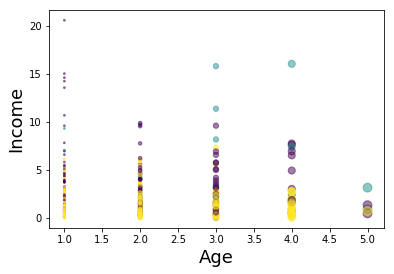

In [12]:
area = np.pi * ( X[:, 1])**2    

plt.scatter(X[:, 1], X[:, 4], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)

plt.show()


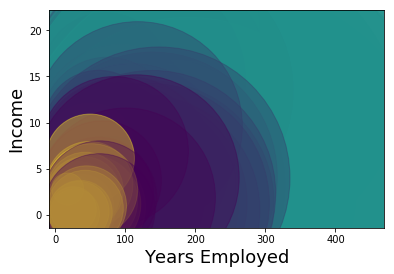

In [14]:
area = np.pi * ( X[:, 3])**2    

plt.scatter(X[:, 3], X[:, 4], s=area, c=labels.astype(np.float), alpha=0.4)
plt.xlabel('Years Employed', fontsize=18)
plt.ylabel('Income', fontsize=18)

plt.show()

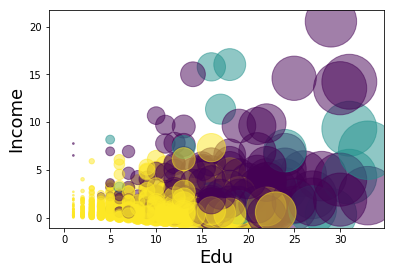

In [15]:
area = np.pi * ( X[:, 2])**2    

plt.scatter(X[:, 2], X[:, 4], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Edu', fontsize=18)
plt.ylabel('Income', fontsize=18)

plt.show()

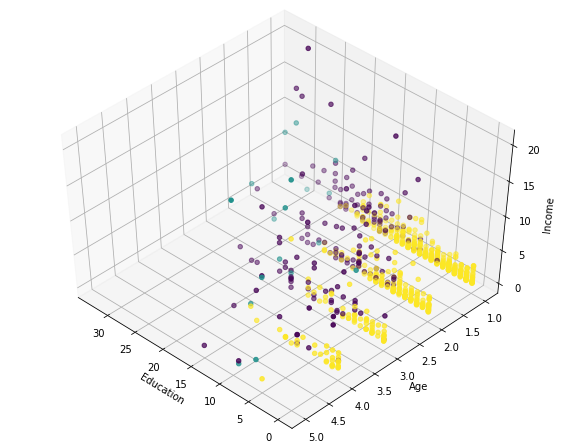

In [16]:
from mpl_toolkits.mplot3d import Axes3D       

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

# ax.scatter(X[:, 1], X[:, 3], c= labels.astype(np.float))
# ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
ax.scatter(X[:, 2], X[:, 1], X[:, 4], c= labels.astype(np.float))

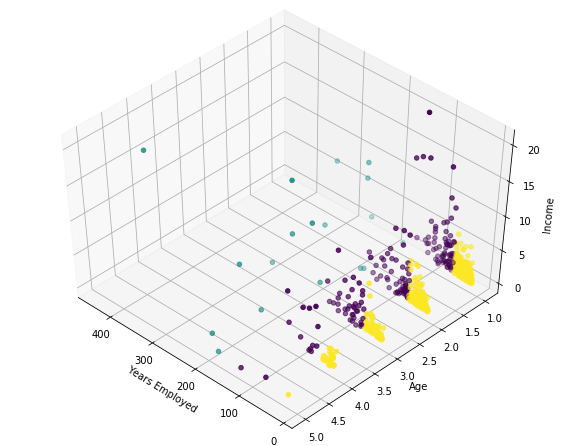

In [17]:
from mpl_toolkits.mplot3d import Axes3D       

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

# ax.scatter(X[:, 1], X[:, 3], c= labels.astype(np.float))
ax.scatter(X[:, 3], X[:, 1], X[:, 4], c= labels.astype(np.float))

Kmeans will partition the customers into mutually exclusive groups (3 clusters in this case). The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 3 clusters can be:

  1. AFFLUENT, EDUCATED AND OLD AGED
  2. MIDDLE AGED AND MIDDLE INCOME
  3. YOUNG AND LOW INCOME

#### Let's mark down the centroids when fitting kmeans to the dataset with k=3

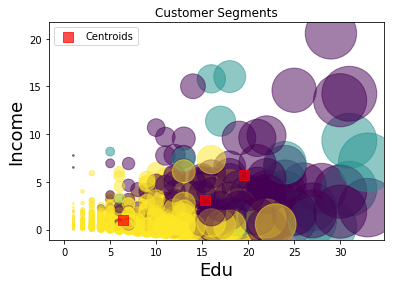

In [18]:
# Fitting kmeans to the dataset with k=3

km3=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km3.fit_predict(X)

#Visualizing the clusters for k=3
area = np.pi * ( X[:, 2])**2    

plt.scatter(X[:, 2], X[:, 4], s=area, c=labels.astype(np.float), alpha=0.5)
plt.scatter(km3.cluster_centers_[:,2], km3.cluster_centers_[:,4],s=100,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Edu', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.legend()
plt.show()

#### We then find the optimum number of clusters using Elbow mehtod

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

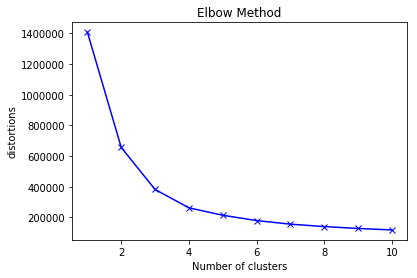

In [20]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
distortions = []
K = range(1,11)
for k in K:
    km=KMeans(n_clusters=k,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distortions')
plt.show()

In [21]:
print(distortions)

[1408001.2844996965, 655932.1242140447, 381849.38215028425, 262046.95293969213, 213668.31377049844, 179027.60758667547, 155416.5370956549, 139760.14878630103, 127245.66193888745, 117828.54844964007]


#### Below is an additional simple case in which we may theoretically prove finding the optimal value for k in Elbow method

In [22]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

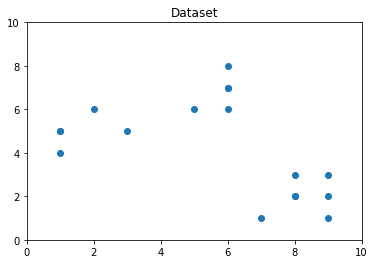

In [24]:
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [25]:
# create new plot and data
# plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

In [26]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


In [27]:
distortions

[3.4577032384495707,
 1.7687413573405673,
 0.8819889697423957,
 0.7587138847606585,
 0.6635212812400347,
 0.6026238181316149,
 0.49495373896312317,
 0.42618267462691206,
 0.3333333333333333]

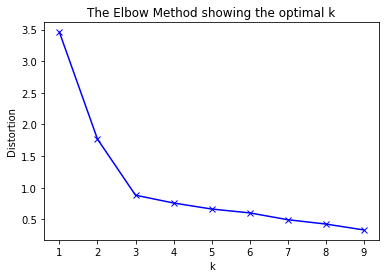

In [28]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()